In [13]:
# Uyğun olaraq istifadə oluanacaq kitabxanaların əlavə olunması
# adding libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datasetin daxili yaddaşdan əldə edilməsi
# Retrieve dataset from internal storage
market_dataset = pd.read_csv(r"C:\Users\Elvin\OneDrive\İş masası\Data-Analys\Projects with python\Düzenlendi-Supermarket sales dataset train.csv\train.csv")
market_dataset.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3138,3139,CA-2018-164168,12/11/2018,18/11/2018,Standard Class,LS-16975,Lindsay Shagiari,Home Office,United States,Dallas,Texas,75081.0,Central,TEC-AC-10004568,Technology,Accessories,Maxell LTO Ultrium - 800 GB,44.784
7341,7342,CA-2015-116190,26/07/2015,01/08/2015,Standard Class,SG-20470,Sheri Gordon,Consumer,United States,Atlanta,Georgia,30318.0,South,OFF-LA-10002762,Office Supplies,Labels,Avery 485,162.890
9761,9762,CA-2015-121762,14/02/2015,18/02/2015,Standard Class,ML-17395,Marina Lichtenstein,Corporate,United States,Seattle,Washington,98103.0,West,TEC-AC-10000736,Technology,Accessories,Logitech G600 MMO Gaming Mouse,239.970


In [5]:
# Sətir və sütun sayının təyin edilməsi
# Finding the number of rows and columns
market_dataset.shape

(9800, 18)

In [6]:
# Datasetə dair statistik məlumatların əldə olunması
# Obtaining statistical information about the data set
market_dataset.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
# Dataset'də olan sütun adlarının əldə edilməsi
# Getting column names in dataset
market_dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [8]:
# "Row ID" Sütununun Datasetdən çıxarılması
# Remove "Row ID" Column from Dataset
df= market_dataset.drop("Row ID",axis=1)
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [9]:
# Dataset daxilində Null olan sütunların və həmin sütunlarda olan Null dəyərlərin sayının tapılması
# Finding Null columns in a dataset and counting the Null values ​​in those columns
df.isnull().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
# "Postal Code" sütunu daxilində Null olan dəyərlərin tapılması
# Finding Null values ​​in "Postal Code" column
df[df["Postal Code"].isnull()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [11]:
# Null olan dəyərlərin uyğun dəyərlərlə əvəz olunması
# Replace null values ​​with appropriate values
df["Postal Code"]= df["Postal Code"].fillna(5402)
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [12]:
df[df["City"]=="Burlington"]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
683,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1008,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1038,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1393,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5402.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2928,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5065,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976
5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682


In [16]:
# "Order Date" sütunun tipinin String(Object)-dən Date tipinə çevirilməsi.
# Convert "Order Date" column type from String(Object) to Date type.
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')
df["Order Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
3959 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB


In [44]:
# Ay dəyərini ayrı bir sütun kimi çıxarmaq
# Output the month value as a separate column
df["Month"] = df["Order Date"].dt.month
df.sample(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
5861,CA-2017-101525,2017-01-05,2017-04-05,Second Class,CM-12235,Chris McAfee,Consumer,United States,Little Rock,Arkansas,72209.0,South,OFF-PA-10001497,Office Supplies,Paper,Xerox 1914,109.920,1.0
5066,CA-2018-142090,NaT,2018-07-12,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1781.682,NaN
6481,CA-2018-140872,2018-03-06,2018-10-06,Standard Class,NR-18550,Nick Radford,Consumer,United States,Pembroke Pines,Florida,33024.0,South,FUR-BO-10002824,Furniture,Bookcases,Bush Mission Pointe Library,241.568,3.0
3230,CA-2018-131625,2018-01-09,2018-05-09,Second Class,BN-11515,Bradley Nguyen,Consumer,United States,New York City,New York,10009.0,East,FUR-FU-10004960,Furniture,Furnishings,"Seth Thomas 12"" Clock w/ Goldtone Case",114.900,1.0
6623,CA-2015-130449,2015-06-09,2015-09-09,First Class,VP-21760,Victoria Pisteka,Corporate,United States,San Francisco,California,94109.0,West,OFF-LA-10001934,Office Supplies,Labels,Avery 516,58.480,6.0
8978,CA-2015-119529,2015-03-11,2015-05-11,Second Class,DM-13345,Denise Monton,Corporate,United States,Orange,New Jersey,7050.0,East,OFF-BI-10000546,Office Supplies,Binders,Avery Durable Binders,5.760,3.0
5757,CA-2016-119634,2016-11-08,NaT,Standard Class,BW-11065,Barry Weirich,Consumer,United States,Raleigh,North Carolina,27604.0,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",46.152,11.0
3973,CA-2017-167556,NaT,2017-02-04,Standard Class,JM-15250,Janet Martin,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,29.800,NaN
4416,CA-2015-153983,NaT,2015-06-12,Standard Class,AH-10210,Alan Hwang,Consumer,United States,San Francisco,California,94122.0,West,OFF-FA-10003495,Office Supplies,Fasteners,Staples,30.400,NaN
4280,CA-2015-166989,NaT,NaT,Standard Class,RM-19675,Robert Marley,Home Office,United States,New York City,New York,10011.0,East,OFF-PA-10004470,Office Supplies,Paper,"Adams Write n' Stick Phone Message Book, 11"" X...",11.360,NaN


In [45]:
# "Month" sütununda olan dəyərlərin uyğun olaraq Ay adları ilə əvəz olunması.
# Replacing the values ​​in the "Month" column with Month names accordingly.
d={1:"Yanvar",2:"Fevral",3:"Mart",4:"Aprel",5:"May",6:"Iyun",7:"Iyul",8:"Avqust",9:"Sentyabr",10:"Oktyabr",11:"Noyabr",12:"Dekabr"}
df["Month"] = [d.get(i, np.nan) for i in df["Month"]]
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Avqust
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Avqust
2,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Dekabr
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Noyabr
4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Noyabr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,NaT,NaT,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,NaN
9796,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Dekabr
9797,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Dekabr
9798,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Dekabr


In [46]:
# "Ship Date" sütunda dəyər tipinin String(Object)-dən Date tipinə çevirilməsi
# Converting the value type in the "Ship Date" column from String(Object) to Date type
df["Ship Date"] = pd.to_datetime(df["Ship Date"],errors='coerce')
df["Ship Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9800 entries, 0 to 9799
Series name: Ship Date
Non-Null Count  Dtype         
--------------  -----         
3815 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.7 KB


In [54]:
# Dataset'ə "Year" sütunun əlavə olunması
# Adding "Year" column to dataset
df["Year"] = df["Order Date"].dt.year
df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month,Year
5608,CA-2016-168634,2016-06-12,2016-11-12,Standard Class,AF-10870,Art Ferguson,Consumer,United States,San Francisco,California,94109.0,West,OFF-AP-10001626,Office Supplies,Appliances,Commercial WindTunnel Clean Air Upright Vacuum...,7.780,Iyun,2016.0
7061,CA-2016-132633,2016-03-02,2016-05-02,Second Class,KH-16630,Ken Heidel,Corporate,United States,Pleasant Grove,Utah,84062.0,West,OFF-BI-10002432,Office Supplies,Binders,Wilson Jones Standard D-Ring Binders,12.144,Mart,2016.0
66,US-2016-164175,NaT,2016-05-05,Standard Class,PS-18970,Paul Stevenson,Home Office,United States,Chicago,Illinois,60610.0,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",213.115,NaN,NaN
2590,US-2017-115455,2017-08-09,NaT,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,Wheeling,Illinois,60090.0,Central,FUR-FU-10004671,Furniture,Furnishings,"Executive Impressions 12"" Wall Clock",14.136,Avqust,2017.0
3423,CA-2017-134803,NaT,2017-03-06,Standard Class,CL-12565,Clay Ludtke,Consumer,United States,Los Angeles,California,90004.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,NaN,NaN


In [53]:
# "Year" sütununda olan dəyərlərin illərə görə sayı
# Number of values ​​in the "Year" column by year
df["Year"].value_counts()

Year
2018.0    1304
2017.0    1059
2016.0     813
2015.0     783
Name: count, dtype: int64

In [55]:
# "Month" sütununda olan dəyərlərin Aylara görə sayı
# Number of values ​​in the "Month" column by Month
df["Month"].value_counts()

Month
Fevral      370
May         362
Mart        357
Noyabr      351
Avqust      348
Sentyabr    344
Dekabr      334
Yanvar      329
Aprel       305
Oktyabr     295
Iyul        294
Iyun        270
Name: count, dtype: int64

In [56]:
# Edilən cəm satışın Ay dəyərlərinə görə qruplanması
# Grouping of total sales by monthly values
df_month = df.groupby("Month")["Sales"].sum()
df_month

Month
Aprel        65094.9490
Avqust      100560.3526
Dekabr       64819.3662
Fevral      103951.1600
Iyul         62393.9465
Iyun         51099.1360
Mart         71788.6906
May          64277.0788
Noyabr       68274.3135
Oktyabr      62563.7830
Sentyabr     66582.3650
Yanvar       90957.9824
Name: Sales, dtype: float64

In [57]:
df_month=df_month.reset_index()
df_month

,Month,Sales
0,Aprel,65094.9490
1,Avqust,100560.3526
2,Dekabr,64819.3662
3,Fevral,103951.1600
4,Iyul,62393.9465
5,Iyun,51099.1360
6,Mart,71788.6906
7,May,64277.0788
8,Noyabr,68274.3135
9,Oktyabr,62563.7830


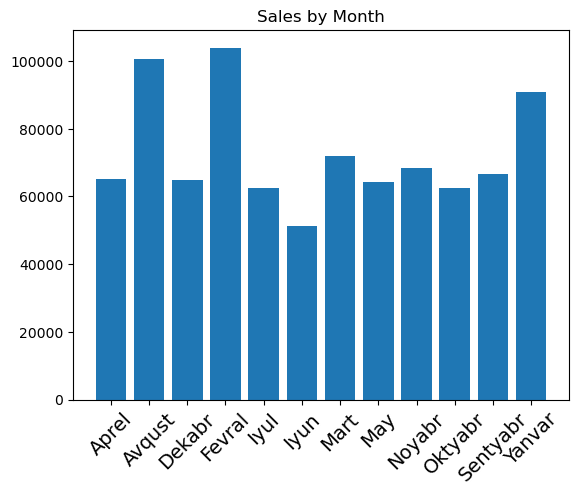

In [58]:
# Edilən cəm satışın Ay dəyərlərinə görə qruplanması və buna uyğun olaraq Sütun qrafikinin yaradılması
# Grouping total sales by month values ​​and creating a bar chart accordingly
plt.bar(df_month["Month"], df_month["Sales"])
plt.title("Sales by Month")

plt.xticks(fontsize=14,rotation=45)

plt.show()


In [59]:
# Edilən cəm satışın İl dəyərlərinə görə qruplanması
# Grouping of total sales by Year values
df_year = df.groupby("Year")["Sales"].sum()

In [60]:
df_year= df_year.reset_index()
df_year

,Year,Sales
0,2015.0,176986.5857
1,2016.0,162568.8627
2,2017.0,266254.6009
3,2018.0,266553.0743


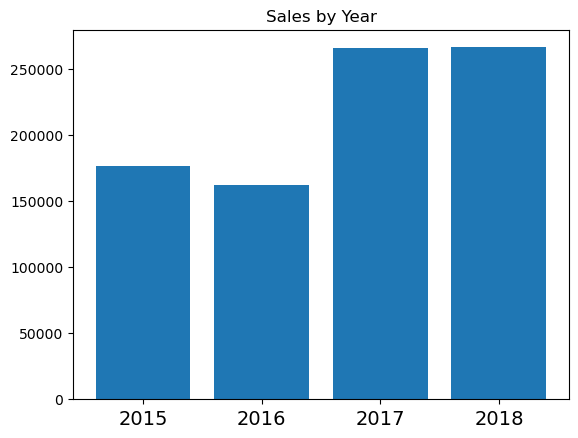

In [61]:
# Edilən cəm satışın İl dəyərlərinə görə qruplanması və buna uyğun olaraq Sütun qrafikinin yaradılması
# Grouping total sales by Year values ​​and creating a bar chart accordingly
plt.bar(df_year["Year"],df_year["Sales"])
plt.title("Sales by Year")
plt.xticks(df_year["Year"],fontsize=14)
plt.show()

In [62]:
# Edilən cəm satışın "Customer Name" sütununda olan dəyərlərə görə qruplanması
# Grouping of total sales by the values ​​in the "Customer Name" column
customer_total= df.groupby("Customer Name")["Sales"].sum()
customer_total=customer_total.sort_values(ascending=False).reset_index()
customer_total

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
...,...,...
788,Mitch Gastineau,16.739
789,Carl Jackson,16.520
790,Sung Chung,14.112
791,Lela Donovan,5.304


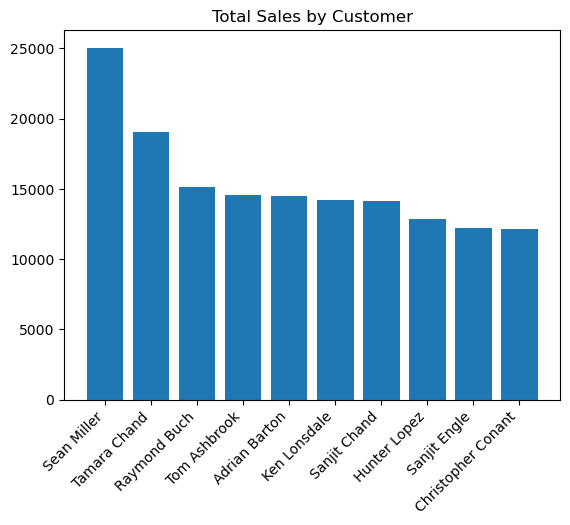

In [63]:
# Edilən cəm satışın"Customer Name" sütununda olan dəyərlərə görə qruplanması və buna uyğun olaraq Sütun qrafikinin yaradılması
# Grouping the total sales by the values ​​in the "Customer Name" column and creating a Column chart accordingly
plt.bar(customer_total["Customer Name"].head(10),customer_total["Sales"].head(10))
plt.title("Total Sales by Customer")
plt.xticks(rotation=45, ha="right")
plt.show()

In [64]:
# Edilən cəm satışın "Category" sütununda olan dəyərlərə görə qruplanması
# Grouping of total sales by the values ​​in the "Category" column
category_total = df.groupby("Category")["Sales"].sum()
category_total = category_total.sort_values(ascending=False).reset_index()
category_total

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


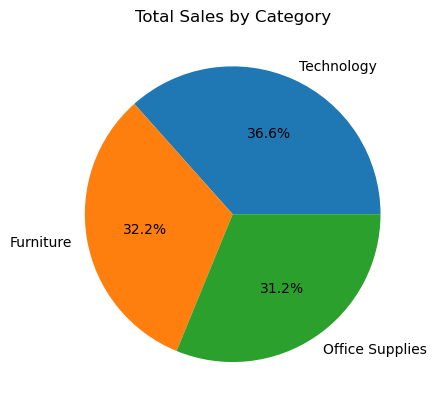

In [65]:
# Edilən cəm satışın "Category" sütununda olan dəyərlərə görə qruplanması və buna uyğun olaraq Sütun qrafikinin yaradılması
# Grouping the total sales by the values ​​in the "Category" column and creating a Column chart accordingly
plt.pie(category_total["Sales"],labels = category_total["Category"],autopct='%1.1f%%')
plt.title("Total Sales by Category")
plt.xticks(fontsize=15)
plt.show()